In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import scipy.stats
import scipy.special
import sklearn.linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [2]:
data = pd.read_csv('fraud_dectectionscaled.csv')
data = data.drop(columns = 'Unnamed: 0')
data

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0,1
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0,1
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,1,0
3,181.00,181.00,0.00,21182.00,0.00,1,1,0,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,1,0,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,1,0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,0,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,1,0


In [3]:
data.isnull().values.any()

False

In [10]:
# Separate input features and target
y = data.Fraud
X = data.drop('Fraud', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
col_names=['Amount','OldbalanceOrg','NewbalanceOrig','OldbalanceDest','NewbalanceDest']
features_train = X_train[col_names]
features_test = X_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)
X_train[col_names] = features_train
X_test[col_names] =features_test

In [12]:
X_train

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
3019524,-0.273236,-0.288947,-0.292652,-0.324121,-0.333721,0,0,1,0,1
1012167,-0.286507,-0.257782,-0.264470,-0.324121,-0.333721,0,0,1,0,1
5551834,0.976512,-0.288947,-0.292652,1.008607,1.108158,0,0,0,1,0
2081309,-0.020737,0.158352,0.091938,-0.324121,-0.288121,1,0,0,0,0
4457939,0.034882,-0.252896,-0.292652,0.630113,0.603782,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2249467,-0.110158,-0.287484,-0.292652,-0.207058,-0.194467,1,0,0,0,0
5157699,-0.292694,-0.281981,-0.287100,-0.249551,-0.263674,1,0,0,0,0
2215104,-0.166434,3.222136,3.202498,-0.242841,-0.280264,0,0,0,0,0
1484405,0.646107,0.085155,0.271062,0.450434,0.228030,0,0,0,0,0


In [13]:
# train model
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

print(accuracy_score(y_test, rfc_pred))
    

print(f1_score(y_test, rfc_pred))
    

print(recall_score(y_test, rfc_pred))

0.9996788534702161
0.8603962650876793
0.7809011988424969


In [14]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred))

Accuracy: 0.9996788534702161


In [15]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.96      0.78      0.86      2419

    accuracy                           1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rcf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rcf.fit(X_train,y_train)

In [17]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None ,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(max_features='auto', n_jobs=1)

In [19]:
import pandas as pd
feature_imp = pd.Series(rcf.feature_importances_,index= X_train.columns)
feature_imp



Amount            0.0
OldbalanceOrg     0.0
NewbalanceOrig    0.0
OldbalanceDest    0.0
NewbalanceDest    0.0
Type_CASH_OUT     0.0
Type_DEBIT        0.0
Type_PAYMENT      0.0
Type_TRANSFER     0.0
Type2_CM          0.0
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


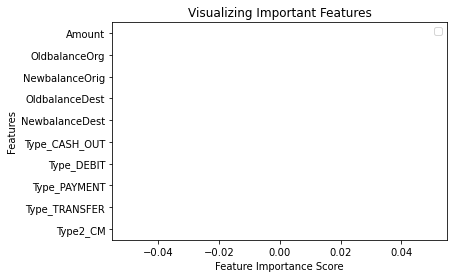

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Import train_test_split function
# Split dataset into features and labels
X=data[['Amount','OldbalanceOrg','NewbalanceOrig','OldbalanceDest','NewbalanceDest','Type_CASH_OUT','Type_TRANSFER']] 
# Removed feature Type_DEBIT , Type_PAYMENT ,Type2_CM
y=data.Fraud                                     
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rcf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rcf.fit(X_train,y_train)

# prediction on test set
y_pred=rcf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred)) 

In [ ]:
# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, smote.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, smote.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(smote,X_test,y_test);

# Undersample majority

In [ ]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Fraud
X_train = downsampled.drop('Fraud', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

# Checking accuracy
print(accuracy_score(y_test, undersampled_pred))
    

# f1 score
print(f1_score(y_test, undersampled_pred))
   

print(recall_score(y_test, undersampled_pred))
    

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [17]:
#Standardizing the numerical columns
col_names=['Amount','OldbalanceOrg','NewbalanceOrig','OldbalanceDest','NewbalanceDest']
features_train = X_train[col_names]
features_test = X_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)
X_train[col_names] = features_train
X_test[col_names] =features_test

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\hecto\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = logreg.predict(X_test) #Predict on the test not train!
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test))) #Percentage

Accuracy of logistic regression classifier on test set: 1.00


In [20]:
print('Classification Report Model 1\n',classification_report(y_test,y_pred ),'\n\n')

Classification Report Model 1
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.90      0.40      0.55      2419

    accuracy                           1.00   1908786
   macro avg       0.95      0.70      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786
 




In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1906255     112]
 [   1457     962]]


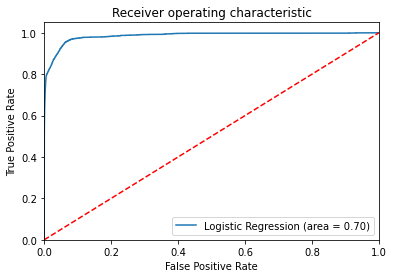

In [22]:
# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()